In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
# Load the CSV file
df = pd.read_csv('salaries.csv')

# Show first few rows
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Manager,202500,USD,202500,US,0,US,M
1,2025,MI,FT,Manager,106500,USD,106500,US,0,US,M
2,2025,SE,FT,Data Analyst,155168,USD,155168,US,100,US,M
3,2025,SE,FT,Data Analyst,88251,USD,88251,US,100,US,M
4,2025,EX,FT,Director,275000,USD,275000,US,0,US,M


In [12]:
# Check basic info
df.info()

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# Check column names
print("\nColumns:\n", df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128304 entries, 0 to 128303
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           128304 non-null  int64 
 1   experience_level    128304 non-null  object
 2   employment_type     128304 non-null  object
 3   job_title           128304 non-null  object
 4   salary              128304 non-null  int64 
 5   salary_currency     128304 non-null  object
 6   salary_in_usd       128304 non-null  int64 
 7   employee_residence  128304 non-null  object
 8   remote_ratio        128304 non-null  int64 
 9   company_location    128304 non-null  object
 10  company_size        128304 non-null  object
dtypes: int64(4), object(7)
memory usage: 10.8+ MB

Missing values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_reside

In [13]:
# Drop rows with null salaries or job titles
df = df.dropna(subset=['salary_in_usd', 'job_title'])

# Optional: Remove outliers if needed
df = df[df['salary_in_usd'] < 400000]  # Remove ultra high outliers

# Reset index
df.reset_index(drop=True, inplace=True)
    

In [14]:
# Use LabelEncoder for categorical features
le = LabelEncoder()

df['experience_level_enc'] = le.fit_transform(df['experience_level'])
df['employment_type_enc'] = le.fit_transform(df['employment_type'])
df['job_title_enc'] = le.fit_transform(df['job_title'])
df['company_size_enc'] = le.fit_transform(df['company_size'])
df['location_enc'] = le.fit_transform(df['employee_residence'])


In [15]:
# Define X and y
X = df[['experience_level_enc', 'employment_type_enc', 'job_title_enc', 'company_size_enc', 'location_enc']]
y = df['salary_in_usd']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

R2 Score: 0.3381851642541931
RMSE: 55366.182051378266


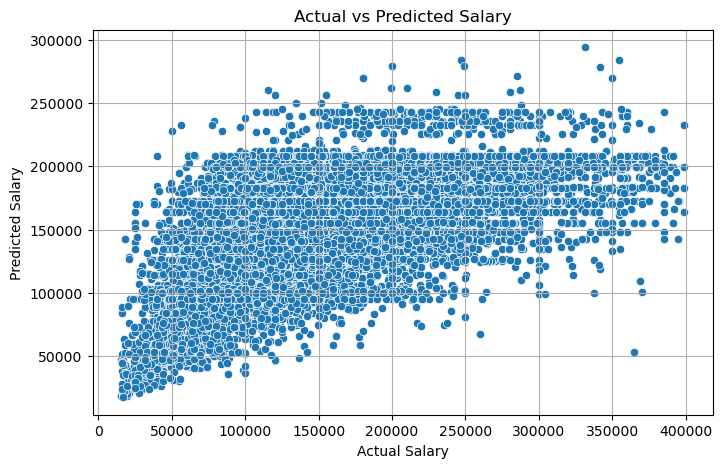

In [17]:
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("RMSE:", rmse)

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


In [19]:
# Step 9: Predict on Custom Example (Safe version without string encoding)

# Aap pehle yeh dekhein ke 'job_title_enc' column me kaunse numbers hain:
print(df['job_title_enc'].unique())         # e.g., [0, 1, 2, ..., 40]
print(df['location_enc'].unique())          # e.g., [0, 1, 2, ..., 20]

# Ab hum manually unhi encoded values ka ek example input banate hain:
example = pd.DataFrame({
    'experience_level_enc': [2],     # e.g., Senior
    'employment_type_enc': [1],      # e.g., Full-time
    'job_title_enc': [10],           # Replace with valid number from above
    'company_size_enc': [1],         # e.g., Medium
    'location_enc': [5]              # Replace with valid number from above
})

# Predict salary
prediction = model.predict(example)
print("Predicted Salary: $", round(prediction[0], 2))


[276 113 214 359 175 340 158 223 184 338 260 109  96 111 189   4 124  34
 159 217  47 212 130 129  83 102 318 232 360 121  46 380 149  49 242 358
  36 157 356 327 100 291 148 135 326 210  76 238  79 150 373 334  23   0
 226  70 172 319 362  27 336 372 321   3  75  60 378 224 353 361 323  48
  29 300 177 294 296 216 128 371  67 363 293 312   2 337 297  98 161 253
 347 235 126 368 120 332 218  80  39 354  38 220 142 315 317 191 173 155
  86 271 270  99 147  32 194 110 379 131 133 169 231 386 369 190 198  57
 240 382 292 295 286 329 207 222 352   9  87 257  25  68 311  88 370 163
 138  24 204  40  11  22 225 357 333 174  54  31 239  93 322   5 314 182
 325 164   8 192 273 122 137 106 243  50 205  17 203 375  59  73 383  13
 180 381 320 385 236 377 258  18 136 244 348 309  58  81 197 144 151 301
 200 283 166 349  85  95 116 176 145 167  53 288  69 341 256 143 134 211
 171 374  90 188 342 302 152 160 367 201  33  66 245  94 330 262 141 165
 125 213 331 339 118 324 154 105 350  82 186 107 19